### Sentiment Analysis (Flipkart Reviews)

Installing textblob library

In [1]:
!pip install textblob 

Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import spacy
nlp = spacy.load("en_core_web_sm")

Loading data

In [3]:
df=pd.read_csv('/kaggle/input/flipkart-reviews-sentiment-analysis/flipkart.csv')

Removing index

In [4]:
df=df[['Review', 'Rating']]
df

,Review,Rating
0,Best under 60k Great performanceI got it for a...,5
1,Good perfomence...,5
2,Great performance but usually it has also that...,5
3,My wife is so happy and best product 👌🏻😘,5
4,"Light weight laptop with new amazing features,...",5
...,...,...
2299,"Great display, accurate colours at this price ...",5
2300,Superb monitor first brought 1 used for 2 mont...,5
2301,Awesome,5
2302,Only one issue with adapter,5


Checking for null values

In [5]:
df.isnull().sum()

Review    0
Rating    0
dtype: int64

Data Cleaning

In [6]:
#clean the reviews with a function
def cleanReviews(text):
    text = re.sub('@[A-Za-z0-9_]+', '', text) #removes @mentions
    text = re.sub('#','',text) #removes hastag '#' symbol
    text = re.sub('https?:\/\/\S+', '', text)  #removes https
    text = re.sub('\n',' ',text) #removes new line
    text = re.sub(r'www\S+', " ", text) #removes www
    text = re.sub(r'\.|/|:|-', " ", text)
    text = re.sub(r'[^\w\s]','',text)
    return text
df['cleanedReviews'] = df['Review'].apply(cleanReviews) #apply cleanReviews function to the Reviews
df.head() #compares original reviews with cleaned Reviews

,Review,Rating,cleanedReviews
0,Best under 60k Great performanceI got it for a...,5,Best under 60k Great performanceI got it for a...
1,Good perfomence...,5,Good perfomence
2,Great performance but usually it has also that...,5,Great performance but usually it has also that...
3,My wife is so happy and best product 👌🏻😘,5,My wife is so happy and best product
4,"Light weight laptop with new amazing features,...",5,Light weight laptop with new amazing features ...


New dataset from cleaned reviews

In [7]:
df1=df[['cleanedReviews','Rating']]
df1

,cleanedReviews,Rating
0,Best under 60k Great performanceI got it for a...,5
1,Good perfomence,5
2,Great performance but usually it has also that...,5
3,My wife is so happy and best product,5
4,Light weight laptop with new amazing features ...,5
...,...,...
2299,Great display accurate colours at this price r...,5
2300,Superb monitor first brought 1 used for 2 mont...,5
2301,Awesome,5
2302,Only one issue with adapter,5


Count of reviews based on rating

<BarContainer object of 5 artists>

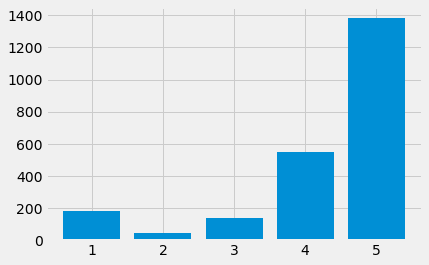

In [8]:
x=[5,4,1,3,2]
plt.bar(x,df['Rating'].value_counts())

Creating sentiments based on reviews as Analysis

In [9]:
#create a function to check negative, neutral and positive analysis
def getAnalysis(rating):
    if rating<3:
        return 'Negative'
    elif rating ==3:
        return 'Neutral'
    else:
        return 'Positive'
    
df1['Analysis'] = df1['Rating'].apply(getAnalysis)

df1

,cleanedReviews,Rating,Analysis
0,Best under 60k Great performanceI got it for a...,5,Positive
1,Good perfomence,5,Positive
2,Great performance but usually it has also that...,5,Positive
3,My wife is so happy and best product,5,Positive
4,Light weight laptop with new amazing features ...,5,Positive
...,...,...,...
2299,Great display accurate colours at this price r...,5,Positive
2300,Superb monitor first brought 1 used for 2 mont...,5,Positive
2301,Awesome,5,Positive
2302,Only one issue with adapter,5,Positive


Creating sentiments based on subjectivity and polarity as Analysis2

We use a library called __TextBlob__ to detect the subjectivity or polarity of a tweet. 

It uses __Natural Language ToolKit (NLTK)__. 

- __Subjectivity__ shows the amount of personal opinion in a sentence. Its score lies between 0 and 1. If a tweet has high subjectivity i.e. close to 1, it means the tweet contains more of a personal opinion than factual information. 
- The __polarity__ score lies between (-1 to 1) where -1 identifies the most negative words and 1 identifies the most positive words.

In [10]:
# Detect sentiments
# get subjectivity and polarity of reviews with a function

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
#get polarity with a function
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
df1['Subjectivity'] = df1['cleanedReviews'].apply(getSubjectivity)
df1['Polarity'] = df1['cleanedReviews'].apply(getPolarity)


In [11]:
df1

,cleanedReviews,Rating,Analysis,Subjectivity,Polarity
0,Best under 60k Great performanceI got it for a...,5,Positive,0.472424,0.438788
1,Good perfomence,5,Positive,0.600000,0.700000
2,Great performance but usually it has also that...,5,Positive,0.666667,0.183333
3,My wife is so happy and best product,5,Positive,0.650000,0.900000
4,Light weight laptop with new amazing features ...,5,Positive,0.763636,0.534091
...,...,...,...,...,...
2299,Great display accurate colours at this price r...,5,Positive,0.691667,0.600000
2300,Superb monitor first brought 1 used for 2 mont...,5,Positive,0.666667,0.625000
2301,Awesome,5,Positive,1.000000,1.000000
2302,Only one issue with adapter,5,Positive,1.000000,0.000000


In [12]:
#create a function to check negative, neutral and positive analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
    
df1['Analysis2'] = df1['Polarity'].apply(getAnalysis)

df1

,cleanedReviews,Rating,Analysis,Subjectivity,Polarity,Analysis2
0,Best under 60k Great performanceI got it for a...,5,Positive,0.472424,0.438788,Positive
1,Good perfomence,5,Positive,0.600000,0.700000,Positive
2,Great performance but usually it has also that...,5,Positive,0.666667,0.183333,Positive
3,My wife is so happy and best product,5,Positive,0.650000,0.900000,Positive
4,Light weight laptop with new amazing features ...,5,Positive,0.763636,0.534091,Positive
...,...,...,...,...,...,...
2299,Great display accurate colours at this price r...,5,Positive,0.691667,0.600000,Positive
2300,Superb monitor first brought 1 used for 2 mont...,5,Positive,0.666667,0.625000,Positive
2301,Awesome,5,Positive,1.000000,1.000000,Positive
2302,Only one issue with adapter,5,Positive,1.000000,0.000000,Neutral


Comparing Analysis based on polarity-subjectivity and based on ratings

In [13]:
df1['Analysis'].value_counts() #shows the counts of reviews' polarity

Positive    1934
Negative     230
Neutral      140
Name: Analysis, dtype: int64

In [14]:
df1['Analysis2'].value_counts() #shows the counts of reviews' polarity

Positive    2035
Negative     190
Neutral       79
Name: Analysis2, dtype: int64

Sentiment based on polarity

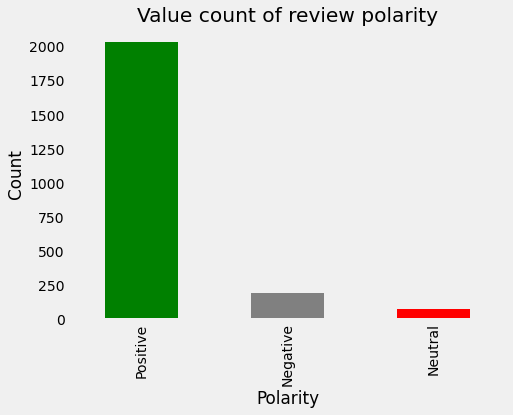

In [15]:
# Plot a bar graph and pie chart for each polarity

#plot a bar graph to show count of review sentiment
fig = plt.figure(figsize=(7,5))
color = ['green','grey','red']
df1['Analysis2'].value_counts().plot(kind='bar',color = color)
plt.title('Value count of review polarity')
plt.ylabel('Count')
plt.xlabel('Polarity')
plt.grid(False)
plt.show()

Sentiment based on ratings

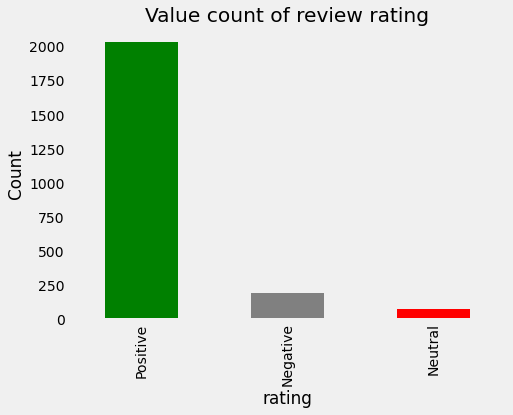

In [16]:
# Plot a bar graph and pie chart for each rating

#plot a bar graph to show count of review sentiment
fig = plt.figure(figsize=(7,5))
color = ['green','grey','red']
df1['Analysis2'].value_counts().plot(kind='bar',color = color)
plt.title('Value count of review rating')
plt.ylabel('Count')
plt.xlabel('rating')
plt.grid(False)
plt.show()

Based on polarity

Text(0.5, 1.0, 'Distribution of polarity')

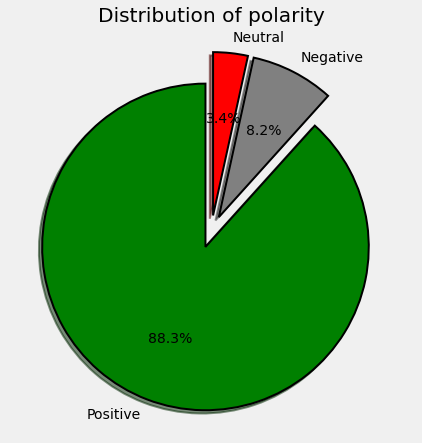

In [17]:
#pie chart to show percentage distribution of polarity
fig = plt.figure(figsize=(7,7))
colors = ('green', 'grey', 'red')
wp={'linewidth':2, 'edgecolor': 'black'}
tags=df1['Analysis2'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, 
         startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of polarity')

Based on ratings

Text(0.5, 1.0, 'Distribution of ratings')

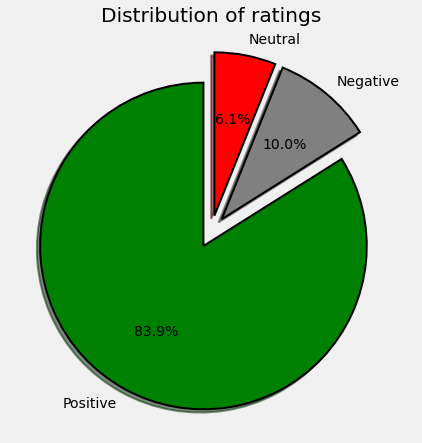

In [18]:
#pie chart to show percentage distribution of ratings
fig = plt.figure(figsize=(7,7))
colors = ('green', 'grey', 'red')
wp={'linewidth':2, 'edgecolor': 'black'}
tags=df1['Analysis'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, 
         startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of ratings')

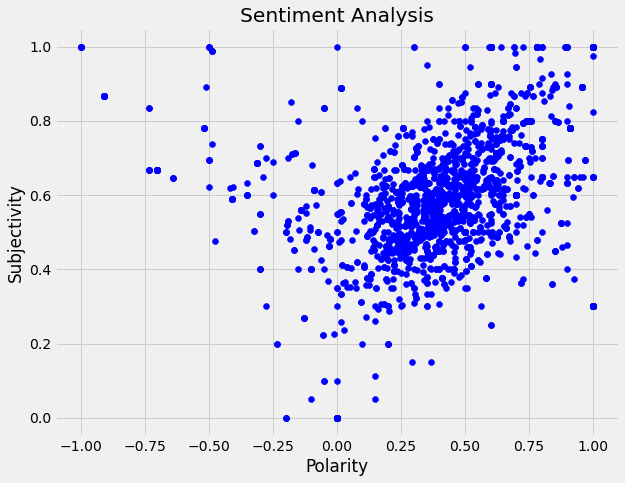

In [19]:
#plot the polarity and subjectivity on a scatter plot
plt.figure(figsize=(9,7))
for i in range(0,df1.shape[0]):
    plt.scatter(df1['Polarity'][i],df1['Subjectivity'][i], color='blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

#### Create a word cloud function for both ***__positive__*** and ***__negative__*** tweets.

Based on subjectivity-polarity

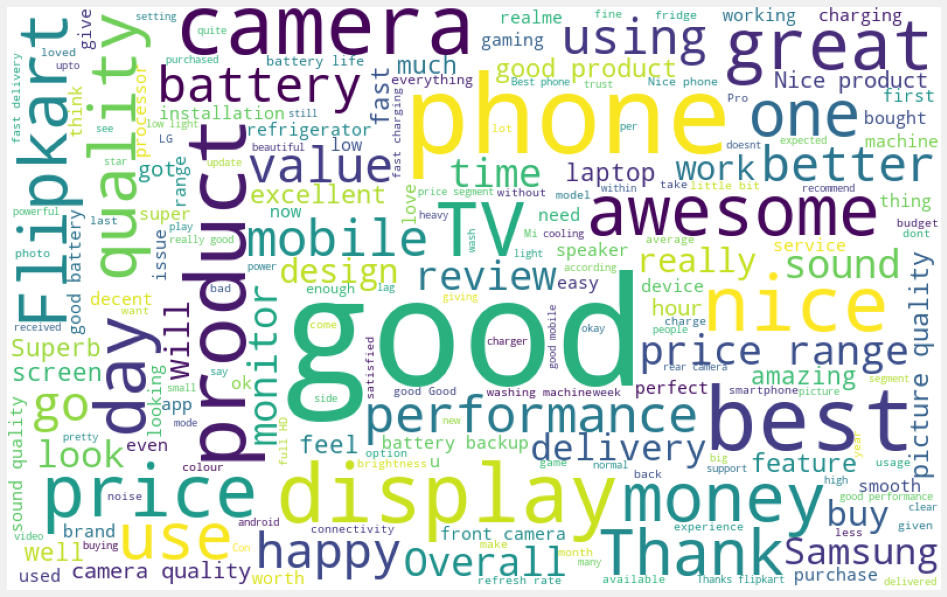

In [20]:
#create a function for wordcloud
def create_wordcloud(text):    
    allWords = ' '.join([x for x in text])
    wordCloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(allWords)
    plt.figure(figsize=(20,10))
    plt.imshow(wordCloud)
    plt.axis('off')
    plt.show()
#wordcloud for positive reviews
posReviews = df1.loc[df1['Analysis2']=='Positive', 'cleanedReviews']
create_wordcloud(posReviews)

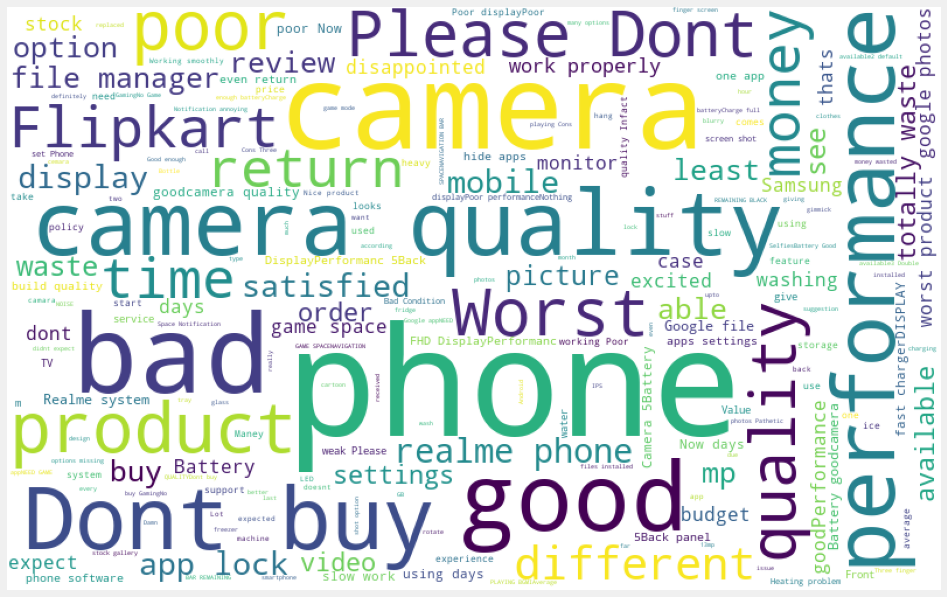

In [21]:
#wordcloud for negative reviews
negReviews = df1.loc[df1['Analysis2']=='Negative', 'cleanedReviews']
create_wordcloud(negReviews)

#### Create a word cloud function for both ***__positive__*** and ***__negative__*** tweets.

Based on ratings

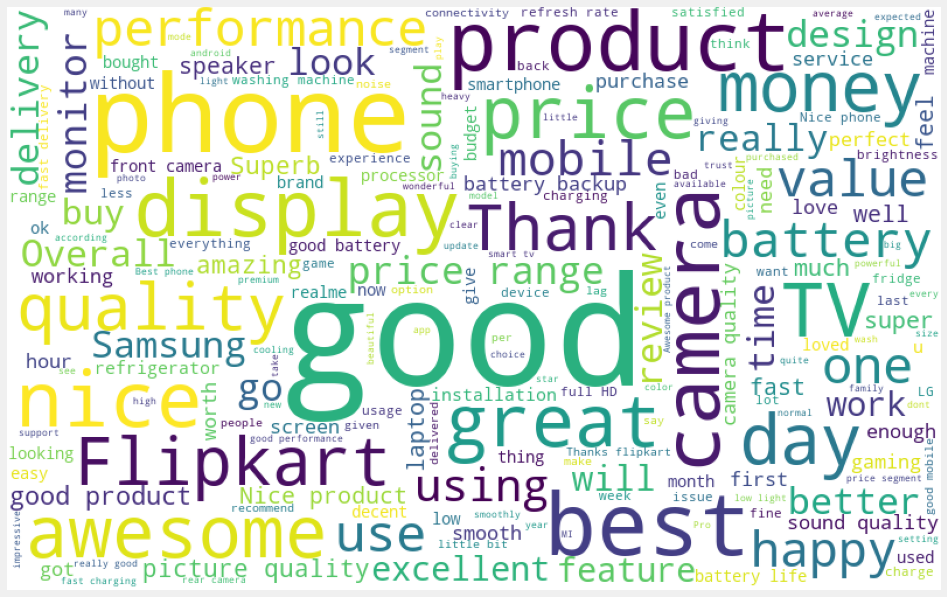

In [22]:
#wordcloud for positive ratings
posReviews = df1.loc[df1['Analysis']=='Positive', 'cleanedReviews']
create_wordcloud(posReviews)

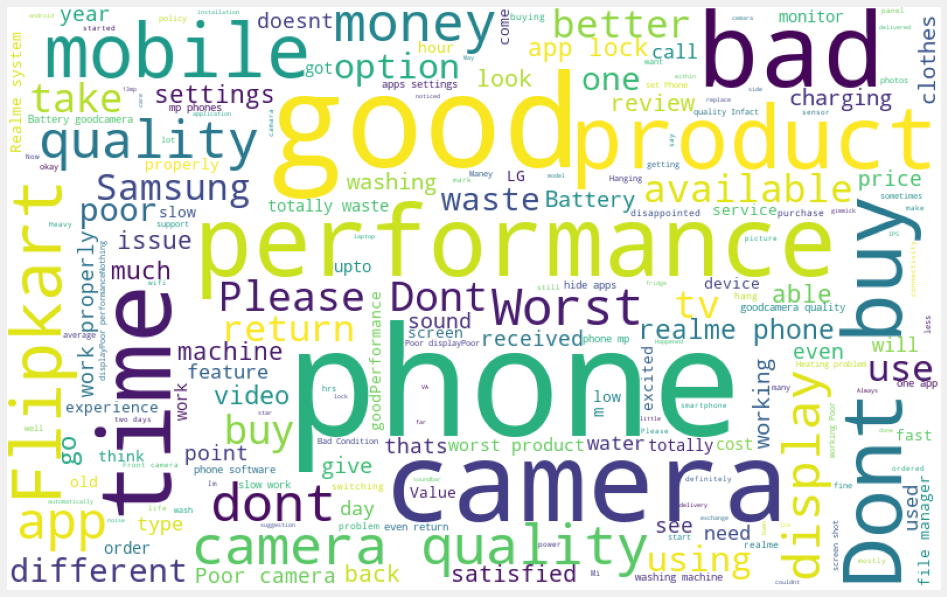

In [23]:
#wordcloud for negative ratings
negReviews = df1.loc[df1['Analysis']=='Negative', 'cleanedReviews']
create_wordcloud(negReviews)